<b>Robins School of Business</b><br/>
<b>ECON 242 - Pandas Basics</b><br/>
<b>Spring 2022</b>
____________________________________________

<h1>Pandas: Split-Apply-Combine -- Reading Questions (Answer Key)</h1>

<b>Before we begin let us import the pandas module for this question set.</b>

In [19]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

<b>Q1: Let us create a simple dataframe below </b>

In [20]:
theDict = {'Store':['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
           'Region': [1, 1, 1, 1, 1, 1, 2, 2, 2],
           'Day': [1, 2, 3, 1, 2, 3, 1, 2, 3],         
           'Sales':[5, 9, 1, 6, 4, 1, 5, 3, 2]} 

df = pd.DataFrame(theDict)

df

,Store,Region,Day,Sales
0,A,1,1,5
1,A,1,2,9
2,A,1,3,1
3,B,1,1,6
4,B,1,2,4
5,B,1,3,1
6,C,2,1,5
7,C,2,2,3
8,C,2,3,2


<b>a) Create and display a new data frame that contains the total sales by store.</b>

In [21]:
dfNew = df[['Store', 'Sales']]
dfNew = dfNew.groupby('Store', as_index = False).agg(np.sum)
dfNew

,Store,Sales
0,A,15
1,B,11
2,C,10


<b>b) Create and display a new data frame that contains the total sales by region.</b>

In [22]:
dfNew = df[['Region', 'Sales']]
dfNew = dfNew.groupby('Region', as_index = False).agg(np.sum)
dfNew

,Region,Sales
0,1,26
1,2,10


<b>c) Create and display a new data frame that contains the max sales within a day by region.</b>

In [23]:
dfNew = df[['Region', 'Sales', 'Day']]
dfNew = dfNew.groupby(['Region', 'Day'], as_index = False).agg(np.max)
dfNew

,Region,Day,Sales
0,1,1,6
1,1,2,9
2,1,3,1
3,2,1,5
4,2,2,3
5,2,3,2


<b>d) Create and display a new data frame that contains an additional column with the cummulative sum of sales by store over time.</b>

In [24]:
dfNew = df[['Store', 'Sales']]
dfNew['Cumm_Sales'] = dfNew.groupby('Store', as_index = False).transform(np.cumsum)
dfNew

,Store,Sales,Cumm_Sales
0,A,5,5
1,A,9,14
2,A,1,15
3,B,6,6
4,B,4,10
5,B,1,11
6,C,5,5
7,C,3,8
8,C,2,10


<b>e) Create and display a new data frame that contains the columns store and sales, and an additional column with the previous day sales by store.</b>

In [25]:
dfNew = df[['Store', 'Sales']]
dfNew['Sales(-1)'] = dfNew.groupby('Store', as_index = False).shift(1)
dfNew

,Store,Sales,Sales(-1)
0,A,5,NaN
1,A,9,5.0
2,A,1,9.0
3,B,6,NaN
4,B,4,6.0
5,B,1,4.0
6,C,5,NaN
7,C,3,5.0
8,C,2,3.0


<b>f) Create and display a new data frame that contains the columns store and sales, and an additional column with the change in sales from the previous day store.</b>

In [26]:
dfNew = df[['Store', 'Sales']]
dfNew['Change in Sales'] = dfNew.groupby('Store', as_index = False).shift(0) - dfNew.groupby('Store', as_index = False).shift(1)
dfNew

,Store,Sales,Change in Sales
0,A,5,NaN
1,A,9,4.0
2,A,1,-8.0
3,B,6,NaN
4,B,4,-2.0
5,B,1,-3.0
6,C,5,NaN
7,C,3,-2.0
8,C,2,-1.0


<br><b>Q2: Find below code that loads and cleans US COVID-19 data from the web: </b>

In [27]:
#
# Loading in the COVID-19 dataset from JHU
#
df = pd.read_csv("https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")

# Dropping some of the columns we don't need
df = df.drop(columns = ['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Country_Region', 'Lat', 'Long_', 'Admin2'])

# Renaming some columns
df = df.rename(columns = {"Combined_Key":"Area"})

# Drop the columns where the area name is null
df = df[~df['Area'].isnull()]

# Reshape the dataset
columnNames = df.columns.to_list()
df = df.melt(id_vars = ['Area', 'Province_State'], value_vars = columnNames[2:], var_name = 'Date', value_name = 'Cases')

# Change the type of the date column to datatime
df['Date'] = df['Date'].astype('datetime64')

# Reset the index
df = df.reset_index(drop = True)

# Display the final datafram
df

,Area,Province_State,Date,Cases
0,"Autauga, Alabama, US",Alabama,2020-01-22,0
1,"Baldwin, Alabama, US",Alabama,2020-01-22,0
2,"Barbour, Alabama, US",Alabama,2020-01-22,0
3,"Bibb, Alabama, US",Alabama,2020-01-22,0
4,"Blount, Alabama, US",Alabama,2020-01-22,0
...,...,...,...,...
2633491,"Teton, Wyoming, US",Wyoming,2022-03-19,9863
2633492,"Uinta, Wyoming, US",Wyoming,2022-03-19,5635
2633493,"Unassigned, Wyoming, US",Wyoming,2022-03-19,0
2633494,"Washakie, Wyoming, US",Wyoming,2022-03-19,2347


<b>a) Construct a new column that contains the total cases from the day before within each area (Hint: you will have to sort the data first and reset the index)</b>

In [28]:
df = df.sort_values(['Area', 'Province_State', 'Date'])
df = df.reset_index(drop = True)

dfNew = df[['Area', 'Province_State', 'Cases']]
df['Cases(-1)'] = dfNew.groupby(['Area', 'Province_State'], as_index = False).shift(1)

<b>b) Construct a new column that contains the new daily cases</b>

In [29]:
df['New Cases'] = df['Cases'] - df['Cases(-1)']

<b>c) Find the areas with the 5 highest number of cases today</b>

In [30]:
dfNew = df[df['Date'] == max(df['Date'])]
dfNew.nlargest(5, 'New Cases')

,Area,Province_State,Date,Cases,Cases(-1),New Cases
1394759,"Los Angeles, California, US",California,2022-03-19,2823354,2820159.0,3195.0
1678439,"New York, New York, US",New York,2022-03-19,407429,406997.0,432.0
2389215,"Unassigned, Tennessee, US",Tennessee,2022-03-19,38507,38222.0,285.0
2538147,"Westchester, New York, US",New York,2022-03-19,248604,248324.0,280.0
494863,"Collin, Texas, US",Texas,2022-03-19,207308,207040.0,268.0


<b>d) Construct a new table that contains the total number of new cases by day and plot it out</b>

<AxesSubplot:xlabel='Date'>

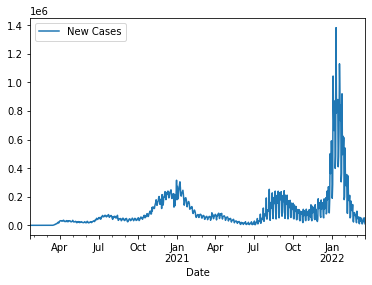

In [31]:
dfNew = df[['Date', 'New Cases']]
dfNew = dfNew.groupby(['Date'], as_index = False).agg(np.sum)
dfNew.plot(x = 'Date', y = 'New Cases')

<b>e) Notice the seasonality in the data in the previous part. Plot the 7-day moving average of the total number of new cases</b>

<AxesSubplot:xlabel='Date'>

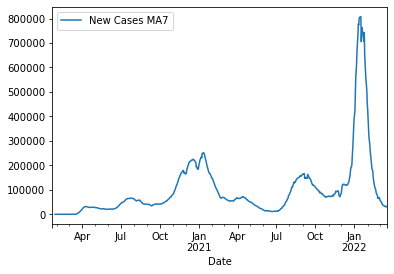

In [32]:
dfNew = df[['Date', 'New Cases']]
dfNew = dfNew.groupby(['Date'], as_index = False).agg(np.sum)
dfNew['New Cases MA7'] = dfNew['New Cases'].rolling(7).mean()
dfNew.plot(x = 'Date', y = 'New Cases MA7')

<b>f) Construct a new table that contains the total number of new cases by state and day</b>

In [36]:
dfNew = df[['Province_State', 'Date', 'New Cases']]
dfNew = dfNew.groupby(['Province_State', 'Date'], as_index = False).agg(np.sum)
dfNew

,Province_State,Date,New Cases
0,Alabama,2020-01-22,0.0
1,Alabama,2020-01-23,0.0
2,Alabama,2020-01-24,0.0
3,Alabama,2020-01-25,0.0
4,Alabama,2020-01-26,0.0
...,...,...,...
45699,Wyoming,2022-03-15,71.0
45700,Wyoming,2022-03-16,0.0
45701,Wyoming,2022-03-17,0.0
45702,Wyoming,2022-03-18,92.0


<b>g) Find the states with the 5 highest number of cases today</b>

In [37]:
dfNew2 = dfNew[dfNew['Date'] == max(dfNew['Date'])]
dfNew2.nlargest(5, 'New Cases')

,Province_State,Date,New Cases
4727,California,2022-03-19,3195.0
29155,New York,2022-03-19,2188.0
39399,Texas,2022-03-19,1522.0
3939,Arkansas,2022-03-19,1131.0
27579,New Jersey,2022-03-19,869.0


<br><b>Q3: These questions incorporate a bunch of things you have learned over the past few weeks:</b>
<br><b> a) Use the economics dataset to find the total labor force by state (Hint: You will have to prepare the data, merge it, and then construct the aggregates by state). Display the result in descending order. </b>

In [38]:
# Loading in the countynames.csv dataset and keeping the columns we need
df1 = pd.read_csv("~/../smehkari/EconCourses/data/SplitFiles/countynames.csv")
df1 = df1[['region_code', 'state_code']]

# Loading in the employmentdata.csv dataset and keeping the columns we need
df2 = pd.read_csv("~/../smehkari/EconCourses/data/SplitFiles/employmentdata.csv")
df2 = df2[['region_code', 'labor_force']]

# Cleaning the data
df2['labor_force'] = df2['labor_force'].astype('Int64')
df2 = df2.dropna()

# Combining the two datasets using inner joins
df = pd.merge(df1, df2, how = 'inner', on = 'region_code')

# Displaying the final result (there should be no null values) -- This was an intermediate check
# df.info()

# Grouping the data
dfNew = df[['state_code', 'labor_force']]
dfNew = dfNew.groupby(['state_code'], as_index = False).agg(np.sum)

# Sort the results
dfNew = dfNew.sort_values('labor_force', ascending = False)
dfNew = dfNew.reset_index(drop = True)

# Display the results
dfNew

,state_code,labor_force
0,CA,19280817
1,TX,13816707
2,FL,10173541
3,NY,9521874
4,IL,6463964
5,PA,6423713
6,OH,5780750
7,GA,5080492
8,NC,4986143
9,MI,4908721


<br><b> b) Use the economics dataset to find the gdp per capita by state (Hint: You will have to prepare the data, merge it, and then construct the aggregates by state). Display the result in descending order. </b>

In [39]:
# Loading in the countynames.csv dataset and keeping the columns we need
df1 = pd.read_csv("~/../smehkari/EconCourses/data/SplitFiles/countynames.csv")
df1 = df1[['region_code', 'state_code']]

# Loading in the gdpdata.csv dataset and keeping the columns we need
df2 = pd.read_csv("~/../smehkari/EconCourses/data/SplitFiles/gdpdata.csv")
df2 = df2[['region_code', 'gdp']]

# Dropping the null rows and converting the types
df2 = df2.dropna()
df2['gdp'] = df2['gdp'].astype('float64')
df2['gdp'] = df2['gdp']*1000

# Loading in the populationdata.csv dataset and keeping the columns we need
df3 = pd.read_csv("~/../smehkari/EconCourses/data/SplitFiles/populationdata.csv")
df3 = df3[['region_code', 'population']]

# Dropping the null rows and converting the types
df3 = df3.dropna()
df3['population'] = df3['population'].astype('int64')

# Combining all three datasets using inner joins
df = pd.merge(df1, df2, how = 'inner', on = 'region_code')
df = pd.merge(df, df3, how = 'inner', on = 'region_code')

# Displaying the final result (there should be no null values) -- This was an intermediate check
# df.info()

# Grouping the data
dfNew = df[['state_code', 'gdp', 'population']]
dfNew = dfNew.groupby(['state_code'], as_index = False).agg(np.sum)

# Constructing GDP per capita
dfNew['gdp_per_cap'] = dfNew['gdp']/dfNew['population']

# Just keep the data we want
dfNew = dfNew[['state_code', 'gdp_per_cap']]

# Sort the results
dfNew = dfNew.sort_values('gdp_per_cap', ascending = False)
dfNew = dfNew.reset_index(drop = True)

# Display the results
dfNew


,state_code,gdp_per_cap
0,NY,85066.146551
1,MA,83378.028849
2,WA,77571.279552
3,DE,77389.915692
4,CT,76986.345122
5,ND,74557.547783
6,CA,73528.095300
7,NJ,70030.810941
8,MD,68724.696111
9,IL,67489.030805
